### Build local cache file from Argo data sources
*Execute commands to pull data from the Internet into a local HDF cache file so that we can better interact with the data*

On a development system (where we have not executed a `pip install oxyfloat`) we need to add the oxyfloat directory to the Python search path. Do this before starting the notebook server with (replace `~/dev/oxyfloatgit/` with the directory where you cloned the oxyfloat project):

```bash
export PYTHONPATH=~/dev/oxyfloatgit/
cd ~/dev/oxyfloatgit/notebooks
ipython notebook
```

Alternatively, you can set the path interactively, e.g.:

In [1]:
import sys
sys.path.insert(0, 'c:\Users\saca\Documents\GitHub\oxyfloat')

Import the OxyFloat class and instatiate an OxyFloat object (`of`) with verbosity set to 2 so that we get INFO messages.

In [2]:
from oxyfloat import OxyFloat
of = OxyFloat(verbosity=2)

You can now explore what methods the of object has by typing `of.` in a cell and pressing the tab key. One of the methods is `get_oxy_floats()`; to see what it does select it and press shift-tab with the cursor in the parantheses of `of.get_oxy_floats()`. Let's get a list of all the floats that have been out for at least 340 days and print the length of that list.

In [3]:
%%time
floats340 = of.get_oxy_floats(age_gte=340)
print('{} floats at least 340 days old'.format(len(floats340)))

INFO:root:Reading data from http://argo.jcommops.org/FTPRoot/Argo/Status/argo_all.txt
INFO:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): argo.jcommops.org
INFO:root:Saving DataFrame to name "status" in file /home/mccann/dev/oxyfloatgit/oxyfloat/oxyfloat_cache.hdf


563 floats at least 340 days old
CPU times: user 384 ms, sys: 218 ms, total: 602 ms
Wall time: 1min 33s


/home/mccann/dev/oxyfloatgit/oxyfloat/OxyFloat.py:173: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['WMO', 'TELECOM', 'TTYPE', 'MY_ID', 'SERIAL_NO', 'DATE0', 'NOTIF_DATE', 'SHIP', 'CRUISE', 'DATE_', 'MODEL', 'FULL_NAME', 'EMAIL', 'PROGRAM', 'COUNTRY']]

  self._put_df(self._status_to_df(), self._STATUS)


If this the first time you've executed the cell it will take half minute or so to read the Argo status information from the Internet (the PerformanceWarning can be ignored - for this small table it doesn't matter much). 

Once the status information is read it is cached locally and further calls to `get_oxy_floats()` will execute much faster. To demonstrate, let's count all the oxygen labeled floats that have been out for at least 2 years. 

In [4]:
%%time
floats730 = of.get_oxy_floats(age_gte=730)
print('{} floats at least 730 days old'.format(len(floats730)))

400 floats at least 730 days old
CPU times: user 28 ms, sys: 6 ms, total: 34 ms
Wall time: 68 ms


Now let's find the Data Assembly Center URL for each of the floats in our list. This list of URLs is also cached.

In [5]:
%%time
dac_urls = of.get_dac_urls(floats340)
print(len(dac_urls))
print '\n'.join(dac_urls[:5])

INFO:root:Reading data from ftp://ftp.ifremer.fr/ifremer/argo/ar_index_global_meta.txt
INFO:root:Saving DataFrame to name "global_meta" in file /home/mccann/dev/oxyfloatgit/oxyfloat/oxyfloat_cache.hdf


562
http://tds0.ifremer.fr/thredds/catalog/CORIOLIS-ARGO-GDAC-OBSaoml/1900722/profiles/catalog.xml
http://tds0.ifremer.fr/thredds/catalog/CORIOLIS-ARGO-GDAC-OBSaoml/1901378/profiles/catalog.xml
http://tds0.ifremer.fr/thredds/catalog/CORIOLIS-ARGO-GDAC-OBSaoml/1901379/profiles/catalog.xml
http://tds0.ifremer.fr/thredds/catalog/CORIOLIS-ARGO-GDAC-OBSaoml/1901498/profiles/catalog.xml
http://tds0.ifremer.fr/thredds/catalog/CORIOLIS-ARGO-GDAC-OBSaoml/1901499/profiles/catalog.xml
CPU times: user 784 ms, sys: 13 ms, total: 797 ms
Wall time: 4.71 s


Now, whenever we need to get profile data our lookups for status and Data Assembly Center catalog web page will be serviced from the local cache. Let's get a Pandas DataFrame (`df`) of 10 profiles from the float with WMO number 19000650.

In [6]:
%%time
of.set_verbosity(0)
df = of.get_float_dataframe('1900650', max_profiles=20)

CPU times: user 2.2 s, sys: 209 ms, total: 2.41 s
Wall time: 1min 39s


Profile data is also cached locally. To demonstrate, perform the same command as the previous cell and note the time difference.

In [7]:
%%time
df = of.get_float_dataframe('1900650', max_profiles=20)

CPU times: user 717 ms, sys: 1 ms, total: 718 ms
Wall time: 1.85 s


Examine the first 5 records of the float data.

In [8]:
df.head()

,TEMP_ADJUSTED,PSAL_ADJUSTED,DOXY_ADJUSTED,PRES_ADJUSTED,LATITUDE,LONGITUDE,JULD
2010-03-11T17:39:40_4.30000019073,29.790001,34.827457,206.490005,4.300000,6.031,-14.026,2010-03-12 01:39:40.003200
2010-03-11T17:39:40_5.90000009537,29.789000,34.827457,206.380005,5.900000,6.031,-14.026,2010-03-12 01:39:40.003200
2010-03-11T17:39:40_9.10000038147,29.790001,34.827457,206.300003,9.100000,6.031,-14.026,2010-03-12 01:39:40.003200
2010-03-11T17:39:40_13.9000005722,29.787001,34.826454,206.850006,13.900001,6.031,-14.026,2010-03-12 01:39:40.003200
2010-03-11T17:39:40_19.5,29.681999,34.847443,206.860001,19.500000,6.031,-14.026,2010-03-12 01:39:40.003200


Let's plot the the profiles.

Populating the interactive namespace from numpy and matplotlib


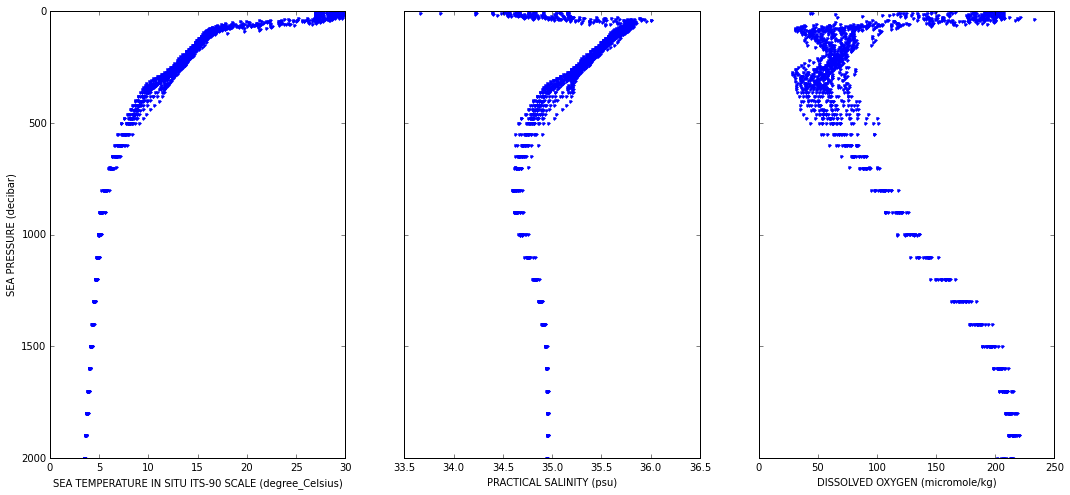

In [9]:
%pylab inline
import pylab as plt
parms = {'TEMP_ADJUSTED': 'SEA TEMPERATURE IN SITU ITS-90 SCALE (degree_Celsius)', 
         'PSAL_ADJUSTED': 'PRACTICAL SALINITY (psu)',
         'DOXY_ADJUSTED': 'DISSOLVED OXYGEN (micromole/kg)'}

plt.rcParams['figure.figsize'] = (18.0, 8.0)
fig, ax = plt.subplots(1, len(parms), sharey=True)
ax[0].invert_yaxis()
ax[0].set_ylabel('SEA PRESSURE (decibar)')

for i, (p, label) in enumerate(parms.iteritems()):
    ax[i].set_xlabel(label)
    ax[i].plot(df[p], df['PRES_ADJUSTED'], '.')
    

and the location of these profiles.

/home/mccann/VirtualEnvs/oxyfloat/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


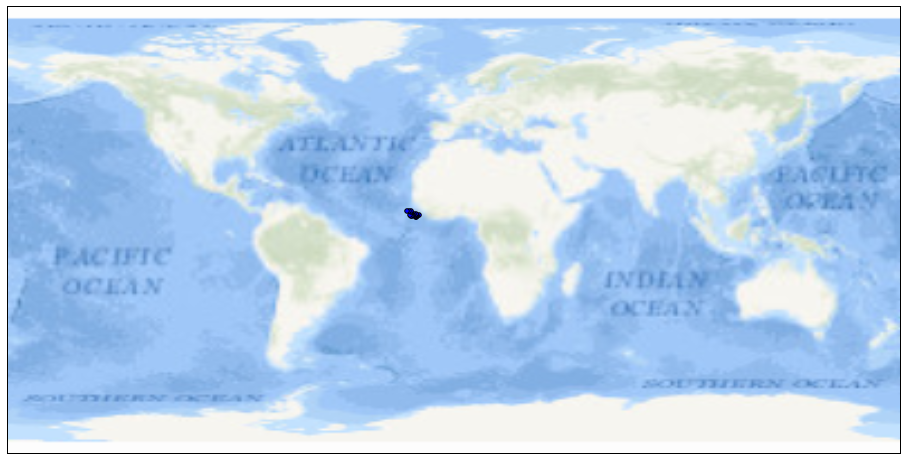

In [10]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='cyl')
m.arcgisimage(server='http://services.arcgisonline.com/ArcGIS', service='Ocean_Basemap')
m.scatter(df['LONGITUDE'].unique(), df['LATITUDE'].unique())